# Seasonal evolution of the ITCZ

In [9]:
from pathlib import Path 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import datetime
import pandas as pd 
import cartopy.crs as ccrs
import seaborn as sns
import cmocean as cmo
mpl.style.use("ccic.mplstyle") 

path = Path('/scratch/ccic_record/data')
mask = xr.open_dataset(path / 'mask_24.nc')
mask = mask.mask.astype(int)

In [2]:
ccic = path / 'ccic' / 'gridsat'/  'ccic_gridsat_monmean.nc'
ccic_ds = xr.open_dataset(ccic)
ccic_ds.tiwp.dims

('month', 'latitude', 'longitude')

In [14]:
print(path) 

/scratch/ccic_record/data


In [17]:
# DARDAR and 2C-ICE

cloudsat = xr.open_dataset( path / 'processed'/ 'cloudsat_ccic_tiwp_ca.nc')
tiwp_2cice = cloudsat.tiwp_monthly_2cice 
tiwp_dardar = cloudsat.tiwp_monthly_dardar

In [4]:
### CCIC
ccic = path / 'ccic' / 'gridsat'/  'ccic_gridsat_monmean.nc'
ccic_ds = xr.open_dataset(ccic)
# apply mask 
mask_ccic= mask.interp(coords = {'longitude': ccic_ds.longitude.values, 'latitude': ccic_ds.latitude.values}, method = 'linear') 

# calculate anomaly of TIWP
#tiwp = (ccic_ds.tiwp - ccic_ds.tiwp.mean('month') ) / ccic_ds.tiwp.mean('month') 

# average over longitude 
tiwp = ccic_ds.tiwp
ccic_gridsat_hovmoller =tiwp.where(mask_ccic > 0).mean('longitude').where((ccic_ds.latitude < 45 ) & (ccic_ds.latitude > -45) , drop = True)
# calculate anomaly based on zonal means 
ccic_gridsat_hovmoller =  (ccic_gridsat_hovmoller - ccic_gridsat_hovmoller.mean('month') ) / ccic_gridsat_hovmoller.mean('month') 

# mean for each season 
ccic_seas = dict()
ccic_seas['JJA'] = ccic_ds.tiwp.where( (ccic_ds.month.dt.month >=6) & (ccic_ds.month.dt.month <=8)).mean('month') 
ccic_seas['MAM'] = ccic_ds.tiwp.where( (ccic_ds.month.dt.month >=3) & (ccic_ds.month.dt.month <=5)).mean('month') 
ccic_seas['SON'] = ccic_ds.tiwp.where( (ccic_ds.month.dt.month >=9) & (ccic_ds.month.dt.month <=11)).mean('month') 
ccic_seas['DJF'] = ccic_ds.tiwp.where( (ccic_ds.month.dt.month ==12) | (ccic_ds.month.dt.month == 1 ) | (ccic_ds.month.dt.month == 2 )).mean('month') 

In [7]:
# CCIC CPCIR 
ccic = path / 'processed'/  'ccic_cpcir_1998-2023_monmean.nc'
ccic_ds = xr.load_dataset(ccic)
# apply mask 
mask_ccic= mask.interp(coords = {'longitude': ccic_ds.longitude.values, 'latitude': ccic_ds.latitude.values}, method = 'linear')
# average over longitude 
ccic_cpcir_hovmoller =ccic_ds.tiwp_mean.mean('longitude').where((ccic_ds.latitude < 45 ) & (ccic_ds.latitude > -45) , drop = True)

# mean for each season 
ccic_seas_cpcir = dict()
ccic_seas_cpcir['JJA'] = ccic_ds.tiwp.where( (ccic_ds.month.dt.month >=6) & (ccic_ds.month.dt.month <=8)).mean('month') 
ccic_seas_cpcir['MAM'] = ccic_ds.tiwp.where( (ccic_ds.month.dt.month >=3) & (ccic_ds.month.dt.month <=5)).mean('month') 
ccic_seas_cpcir['SON'] = ccic_ds.tiwp.where( (ccic_ds.month.dt.month >=9) & (ccic_ds.month.dt.month <=11)).mean('month') 
ccic_seas_cpcir['DJF'] = ccic_ds.tiwp.where( (ccic_ds.month.dt.month ==12) | (ccic_ds.month.dt.month == 1 ) | (ccic_ds.month.dt.month == 2 )).mean('month') 

In [5]:
### ERA5 
era5 = path / 'ERA5' / 'era5_tcsw_tciw_tcc_1980_2023_monmean.nc'
era5_ds = xr.open_dataset(era5)
era5_tiwp = era5_ds.tcsw + era5_ds.tciw
# apply mask 
mask_era5= mask.interp(coords = {'longitude': era5_ds.longitude.values, 'latitude': era5_ds.latitude.values}, method = 'linear')

# calculate anomaly of TIWP
#tiwp = (era5_tiwp - era5_tiwp.mean('time') ) / era5_tiwp.mean('time') 

# average over longitude 
tiwp = era5_tiwp
era5_hovmoller = tiwp.where(mask_era5 > 0).mean('longitude').where((era5_ds.latitude < 45 ) & (era5_ds.latitude > -45) , drop = True) 
# calculate anomaly based on zonal means 
era5_hovmoller =  (era5_hovmoller - era5_hovmoller.mean('time') ) / era5_hovmoller.mean('time') 


# mean for each season
era5_seas = dict()
era5_seas['JJA'] = era5_tiwp.where( (era5_ds.time.dt.month >=  6 ) & (era5_ds.time.dt.month <=  8)).mean('time')[0]
era5_seas['MAM'] = era5_tiwp.where( (era5_ds.time.dt.month >=  3 ) & (era5_ds.time.dt.month <=  5)).mean('time')[0]
era5_seas['SON'] = era5_tiwp.where( (era5_ds.time.dt.month >=  9 ) & (era5_ds.time.dt.month <=  11)).mean('time')[0]
era5_seas['DJF'] = era5_tiwp.where( (era5_ds.time.dt.month ==  12)| (era5_ds.time.dt.month ==    1 ) | (era5_ds.time.dt.month == 2 )).mean('time')[0]

In [6]:
# MODIS 
modis = xr.open_dataset(path / 'processed' / 'modis_global_distribution_cf_tiwp_by_month.nc')
modis_tiwp = modis.TIWP_global_distribution_masked / 1000

# calculate anomaly of TIWP
tiwp = (modis_tiwp - modis_tiwp.mean('month') ) / modis_tiwp.mean('month') 
# average over longitude 
tiwp = modis_tiwp
modis_hovmoller = tiwp.mean('lon').where((modis.lat< 45 ) & (modis.lat > -45) , drop = True) 

# calculate anomaly based on zonal means 
modis_hovmoller =  (modis_hovmoller - modis_hovmoller.mean('month') ) / modis_hovmoller.mean('month') 

#modis_seas = dict()
#modis_seas['JJA'] = modis_tiwp.where( (modis_ds.time.dt.month >=6) & (modis_ds.time.dt.month <=8)).mean('time')
#modis_seas['MAM'] = modis_tiwp.where( (modis_ds.time.dt.month >=3) & (modis_ds.time.dt.month <=5)).mean('time')
#modis_seas['SON'] = modis_tiwp.where( (modis_ds.time.dt.month >=9) & (modis_ds.time.dt.month <=11)).mean('time')
#modis_seas['DJF'] = modis_tiwp.where( (modis_ds.time.dt.month == 12) | (modis_ds.time.dt.month == 1 ) | (modis_ds.time.dt.month == 2 )).mean('time') 

In [7]:
### PATMOS-X
patmos_ds = xr.open_dataset(path / 'PATMOS-x' / 'means' / 'PATMOS-x_timeseries198108-202106_notebook_results.nc') 

# apply mask 
mask_patmos = mask.interp(coords = {'longitude': patmos_ds.longitude.values, 'latitude': patmos_ds.latitude.values}, method = 'linear')
# average over longitude 
patmos_tiwp = patmos_ds.tiwp_fullrecord_monthlymean.where(mask_patmos > 0) / 1000

# calculate anomaly of TIWP
tiwp = (patmos_tiwp - patmos_tiwp.mean('month') ) / patmos_tiwp.mean('month') 
tiwp = patmos_tiwp
patmos_hovmoller = tiwp.mean('longitude').where((patmos_ds.latitude < 45 ) & (patmos_ds.latitude > -45) , drop = True) 
# calculate anomaly based on zonal means 
patmos_hovmoller =  (patmos_hovmoller - patmos_hovmoller.mean('month') )  / patmos_hovmoller.mean('month') 

# mean for each season
#patmos_seas = dict()
#patmos_seas['JJA'] = patmos_tiwp.where( (patmos_ds.time.dt.month >=6) & (patmos_ds.time.dt.month <=8)).mean('time')
#patmos_seas['MAM'] = patmos_tiwp.where( (patmos_ds.time.dt.month >=3) & (patmos_ds.time.dt.month <=5)).mean('time')
#patmos_seas['SON'] = patmos_tiwp.where( (patmos_ds.time.dt.month >=9) & (patmos_ds.time.dt.month <=11)).mean('time')
#patmos_seas['DJF'] = patmos_tiwp.where( (patmos_ds.time.dt.month == 12) | (patmos_ds.time.dt.month == 1 ) | (patmos_ds.time.dt.month == 2 )).mean('time') 

In [8]:
### ISCCP
isccp = path / 'processed' / 'isccp_tiwp_ca.nc'
isccp_ds = xr.open_dataset(isccp) 

# apply mask 
mask_isccp = mask.interp(coords = {'longitude': isccp_ds.longitude.values, 'latitude': isccp_ds.latitude.values}, method = 'linear')

# calculate anomaly of TIWP

tiwp_monthly = (isccp_ds.tiwp_monthly- isccp_ds.tiwp_monthly.mean('month') ) / isccp_ds.tiwp_monthly.mean('month') 
tiwp_monthly = isccp_ds.tiwp_monthly
# average over longitude 
isccp_hovmoller = tiwp_monthly.where(mask_isccp > 0).mean('longitude').where(( isccp_ds.latitude < 45) & (isccp_ds.latitude > -45) , drop = True) 

# calculate anomaly based on zonal means 
isccp_hovmoller =  (isccp_hovmoller - isccp_hovmoller.mean('month') )  / isccp_hovmoller.mean('month') 


### Global maps by season 

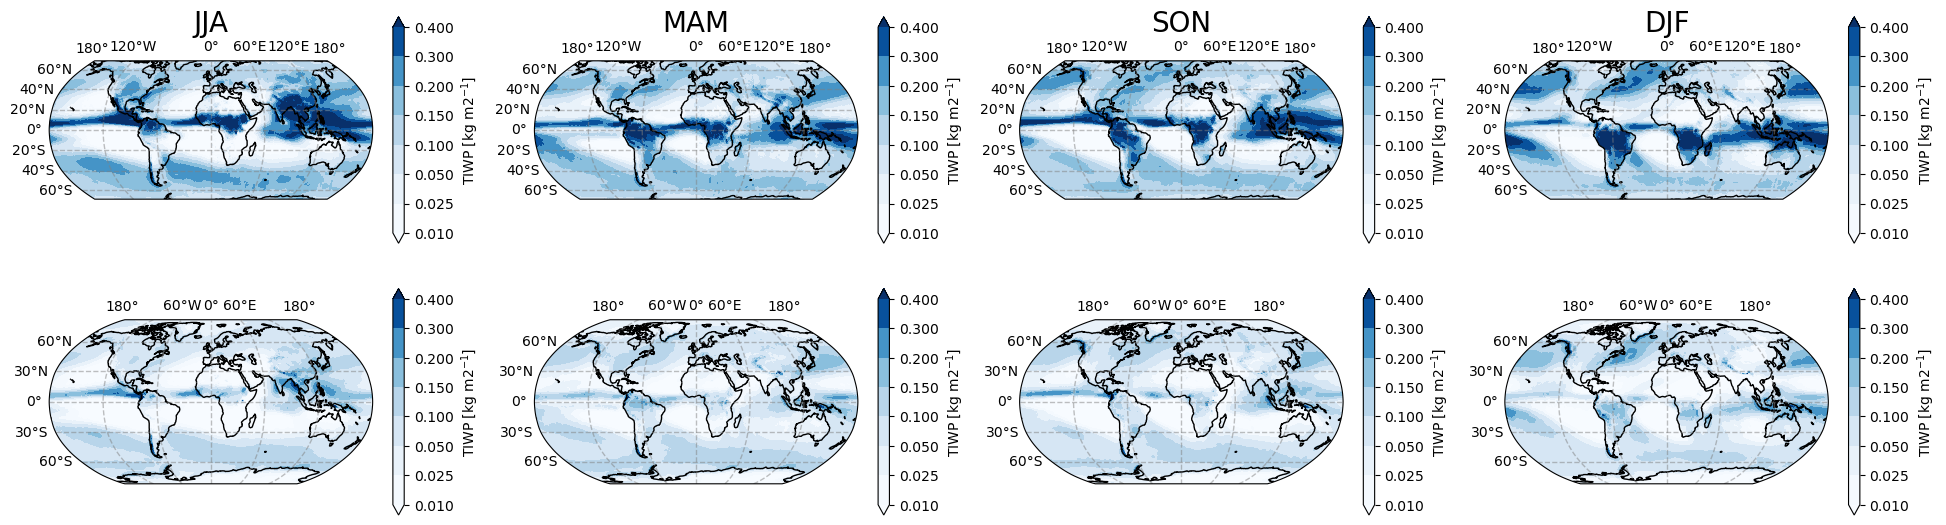

In [46]:
plt.figure(figsize=(24,10))

rows = 3
cols = 4 
levels = [0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4]
cmap = plt.cm.Blues
fs = 16

for idx, seas in enumerate(ccic_seas.keys() ):
    ccic_data = ccic_seas[seas]
    era5_data = era5_seas[seas]
    patmos_data = patmos_seas[seas] / 1000 

    # CCIC 
    ax = plt.subplot(rows, cols, idx +1, projection=ccrs.Robinson())
    # Contour plot
    cs=ax.contourf(ccic_data.longitude, ccic_data.latitude, ccic_data,
                      transform = ccrs.PlateCarree(),levels = levels,
                      cmap=cmap,extend='both')

    #ax.text(-0.07, 0.55, 'CCIC', va='bottom', ha='center',rotation='vertical', rotation_mode='anchor')


    # Title each subplot with the name of the model
    ax.set_title(seas, fontsize = 20)
    
    # Draw the coastines for each subplot
    ax.coastlines(resolution='110m')
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
              draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
    gl.bottom_labels = False
    gl.right_labels = False 
    plt.colorbar(cs, label = 'TIWP [kg m2$^{-1}$]', ax = ax) 

    # ERA5 
    ax = plt.subplot(rows, cols, idx + 5, projection=ccrs.Robinson() )
    # Contour plot
    cs=ax.contourf(era5_data.longitude, era5_data.latitude, era5_data, levels = levels,
                      transform = ccrs.PlateCarree(),
                      cmap=cmap ,extend='both')


    #ax.text(-0.07, 0.55, 'ERA5', va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes)


    # Draw the coastines for each subplot
    ax.coastlines(resolution='110m')
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
              draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
    gl.bottom_labels = False
    gl.right_labels = False 
    plt.colorbar(cs, label = 'TIWP [kg m2$^{-1}$]', ax = ax) 
   
plt.savefig(path / 'plots' / 'global_maps_by_season.png', bbox_inches = 'tight')
plt.show()

In [ ]:


    # PATMOS-X
    ax = plt.subplot(rows, cols, idx + 9, projection=ccrs.Robinson() )
    # Contour plot
    cs=ax.contourf(patmos_data.longitude, patmos_data.latitude,patmos_data, 
                      transform = ccrs.PlateCarree(),
                      cmap=cmap ,extend='both')
    
    #ax.text(-0.07, 0.55, 'PATMOS-X', va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes)

    # Draw the coastines for each subplot
    ax.coastlines(resolution='110m')
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
              draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
    gl.bottom_labels = False
    gl.right_labels = False 
    plt.colorbar(cs, label = 'TIWP [kg m2$^{-1}$]', ax = ax) 


# Hovmoller diagrams: Monthly latitudinal propagation of the ITCZ

In [37]:
import matplotlib 

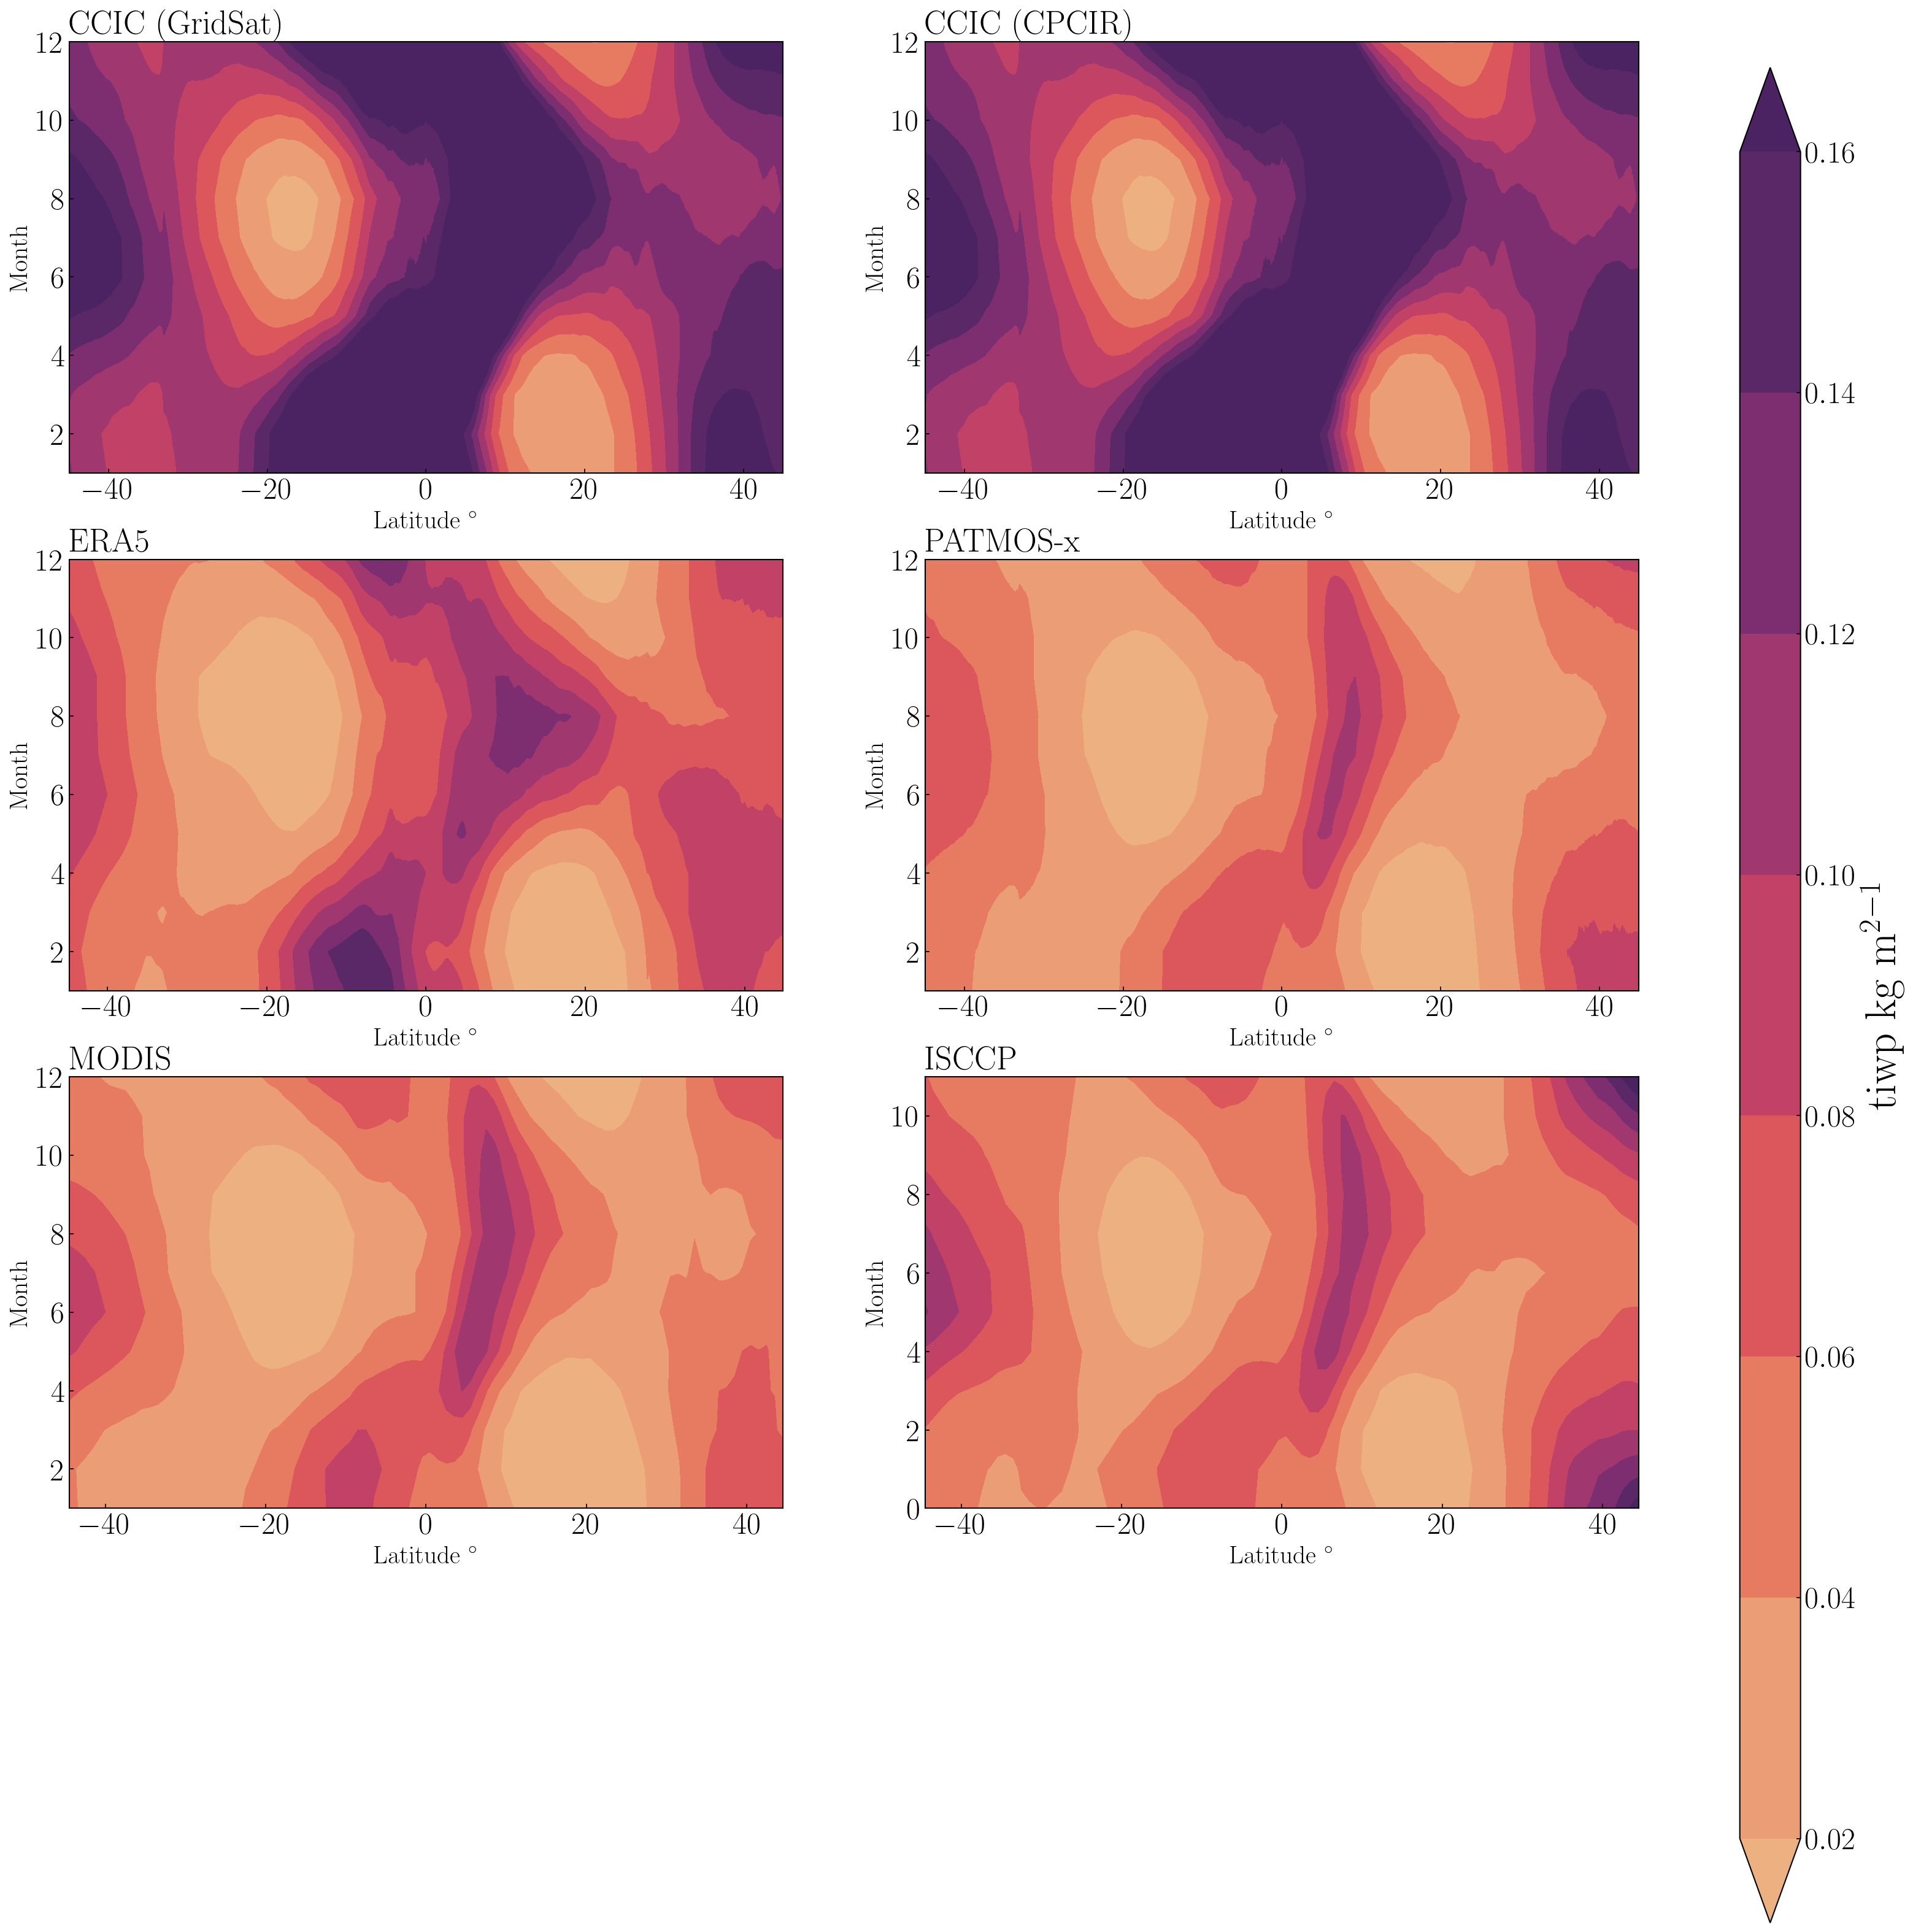

In [44]:
fig = plt.figure(figsize=(22, 28))

levels = np.arange(0,0.325, 0.025)
cols = 2
rows = 4
fs= 26
fs_axis = 20
size = 20

levels = np.arange(0.02, 0.18, 0.02)
cmap = sns.color_palette("flare", as_cmap=True)
matplotlib.rcParams.update({'font.size': 24})

ax = plt.subplot(rows,cols, 1)
ax.set_title('CCIC (GridSat)', fontsize = fs )
m= ax.contourf(ccic_gridsat_hovmoller.latitude, ccic_gridsat_hovmoller.month.dt.month, ccic_gridsat_hovmoller, levels = levels , extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis )

ax = plt.subplot(rows,cols, 2)
ax.set_title('CCIC (CPCIR)', fontsize = fs )
m= ax.contourf(ccic_gridsat_hovmoller.latitude, ccic_gridsat_hovmoller.month.dt.month, ccic_gridsat_hovmoller, levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis )

ax=plt.subplot(rows,cols, 3)
ax.set_title('ERA5', fontsize = fs )
m=ax.contourf(era5_hovmoller.latitude, era5_hovmoller.time.dt.month, era5_hovmoller[:,0,:], levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)

ax=plt.subplot(rows,cols, 4)
ax.set_title('PATMOS-x', fontsize = fs)
m=ax.contourf(patmos_hovmoller.latitude, patmos_hovmoller.month, patmos_hovmoller, levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)

ax=plt.subplot(rows,cols, 5)
ax.set_title('MODIS', fontsize = fs)
m=ax.contourf(np.flip(modis_hovmoller.lat, axis = 0 ) , modis_hovmoller.month, modis_hovmoller.T, levels = levels,extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)


ax=plt.subplot(rows,cols, 6)
ax.set_title('ISCCP', fontsize = fs)
m=ax.contourf(isccp_hovmoller.latitude , isccp_hovmoller.month, isccp_hovmoller , levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)

#ax=plt.subplot(rows,cols, 7)
#ax.set_title('DARDAR', fontsize = fs)

#ax=plt.subplot(rows,cols, 8)
#ax.set_title('2C-ICE', fontsize = fs) 


#### colorbar #### 
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.72])
fig.colorbar(m, cax=cbar_ax).set_label(label = 'tiwp kg m$^2$$^{-1}$', size= 34) 
#plt.colorbar(m, ax = ax).set_label(label = 'tiwp kg m$^2$$^{-1}$', size= size) 

plt.savefig(path / 'plots' / 'evolution_ITCZ_all_datasets.png', bbox_inches = 'tight')
plt.show()

# Anomalies 

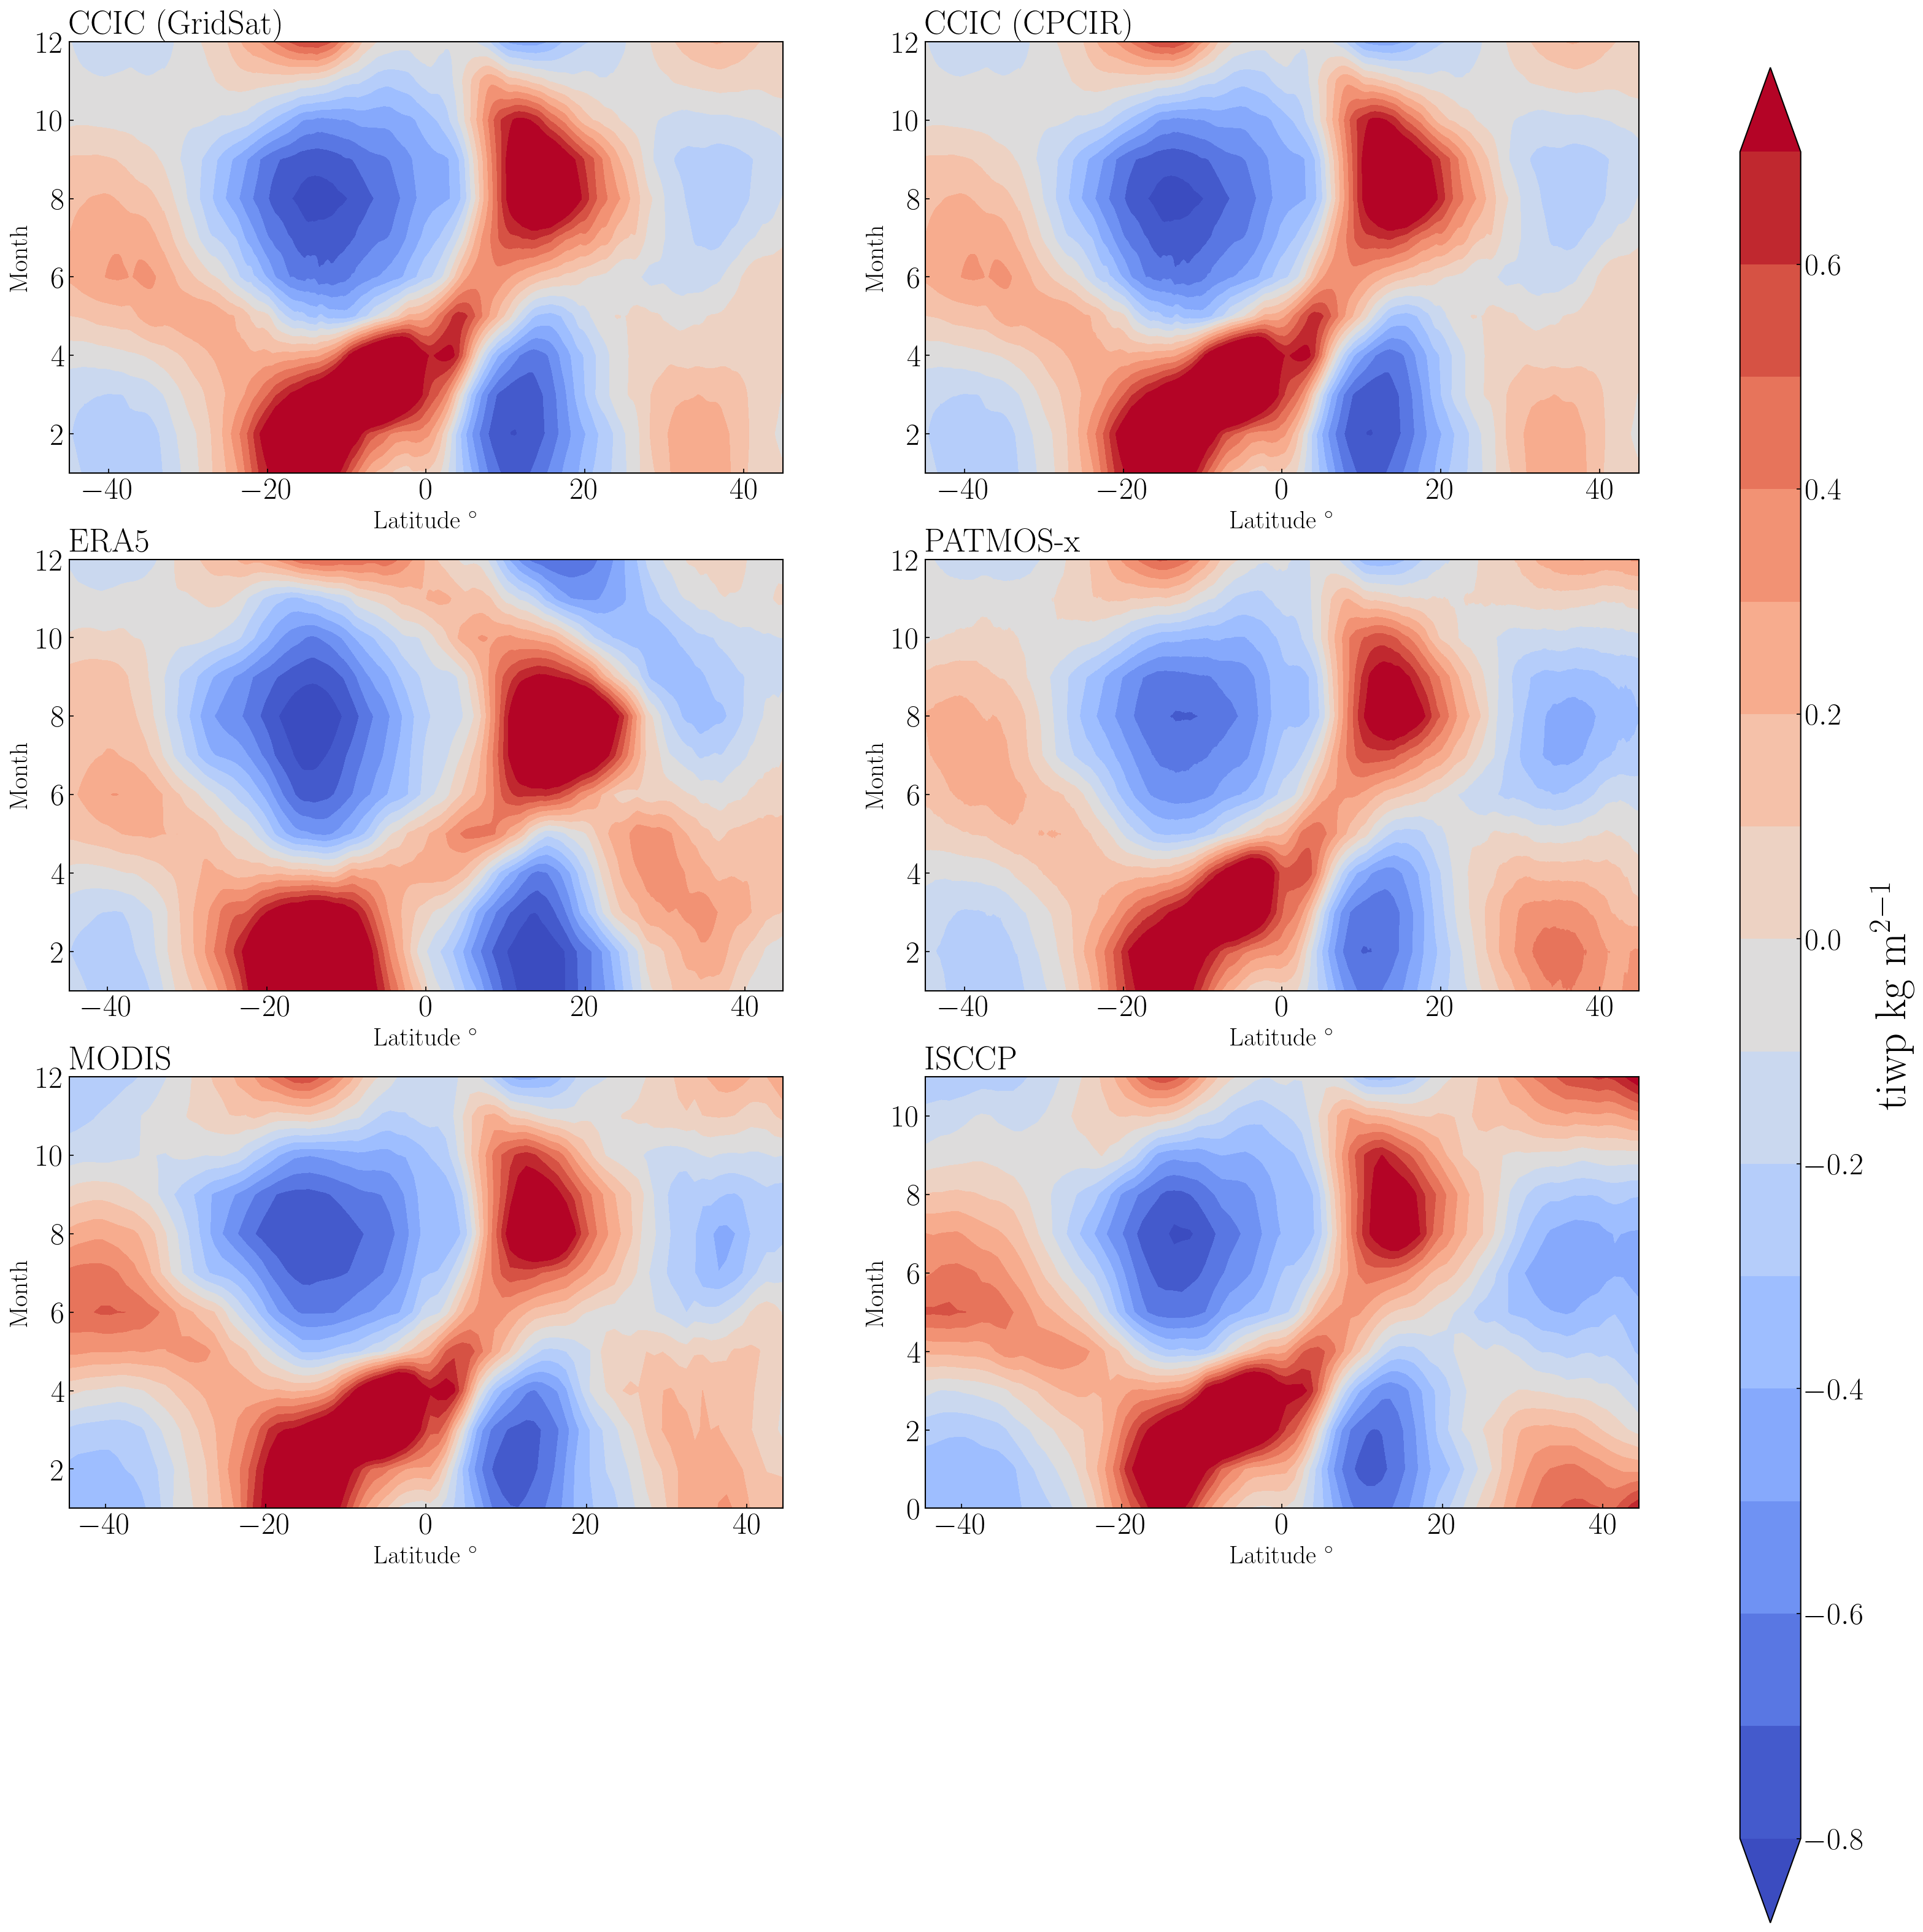

In [66]:
fig = plt.figure(figsize=(22, 28))

levels = np.arange(0,0.325, 0.025)
cols = 2
rows = 4
fs= 26
fs_axis = 20
size = 20

levels = np.arange(-0.8, 0.8, 0.1)
cmap = sns.color_palette("coolwarm", as_cmap=True)
matplotlib.rcParams.update({'font.size': 24})

ax = plt.subplot(rows,cols, 1)
ax.set_title('CCIC (GridSat)', fontsize = fs )
m= ax.contourf(ccic_gridsat_hovmoller.latitude, ccic_gridsat_hovmoller.month.dt.month, ccic_gridsat_hovmoller, levels = levels , extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis )

ax = plt.subplot(rows,cols, 2)
ax.set_title('CCIC (CPCIR)', fontsize = fs )
m= ax.contourf(ccic_gridsat_hovmoller.latitude, ccic_gridsat_hovmoller.month.dt.month, ccic_gridsat_hovmoller, levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis )

ax=plt.subplot(rows,cols, 3)
ax.set_title('ERA5', fontsize = fs )
m=ax.contourf(era5_hovmoller.latitude, era5_hovmoller.time.dt.month, era5_hovmoller[:,0,:], levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)

ax=plt.subplot(rows,cols, 4)
ax.set_title('PATMOS-x', fontsize = fs)
m=ax.contourf(patmos_hovmoller.latitude, patmos_hovmoller.month, patmos_hovmoller, levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)

ax=plt.subplot(rows,cols, 5)
ax.set_title('MODIS', fontsize = fs)
m=ax.contourf(np.flip(modis_hovmoller.lat, axis = 0 ) , modis_hovmoller.month, modis_hovmoller.T , levels = levels,extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)


ax=plt.subplot(rows,cols, 6)
ax.set_title('ISCCP', fontsize = fs)
m=ax.contourf(isccp_hovmoller.latitude , isccp_hovmoller.month, isccp_hovmoller , levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)

#ax=plt.subplot(rows,cols, 7)
#ax.set_title('DARDAR', fontsize = fs)

#ax=plt.subplot(rows,cols, 8)
#ax.set_title('2C-ICE', fontsize = fs) 


#### colorbar #### 
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.72])
fig.colorbar(m, cax=cbar_ax).set_label(label = 'tiwp kg m$^2$$^{-1}$', size= 34) 
#plt.colorbar(m, ax = ax).set_label(label = 'tiwp kg m$^2$$^{-1}$', size= size) 

plt.savefig(path / 'plots' / 'ITCZ_evolution_monthly_anomalies.png', bbox_inches = 'tight')
plt.show()

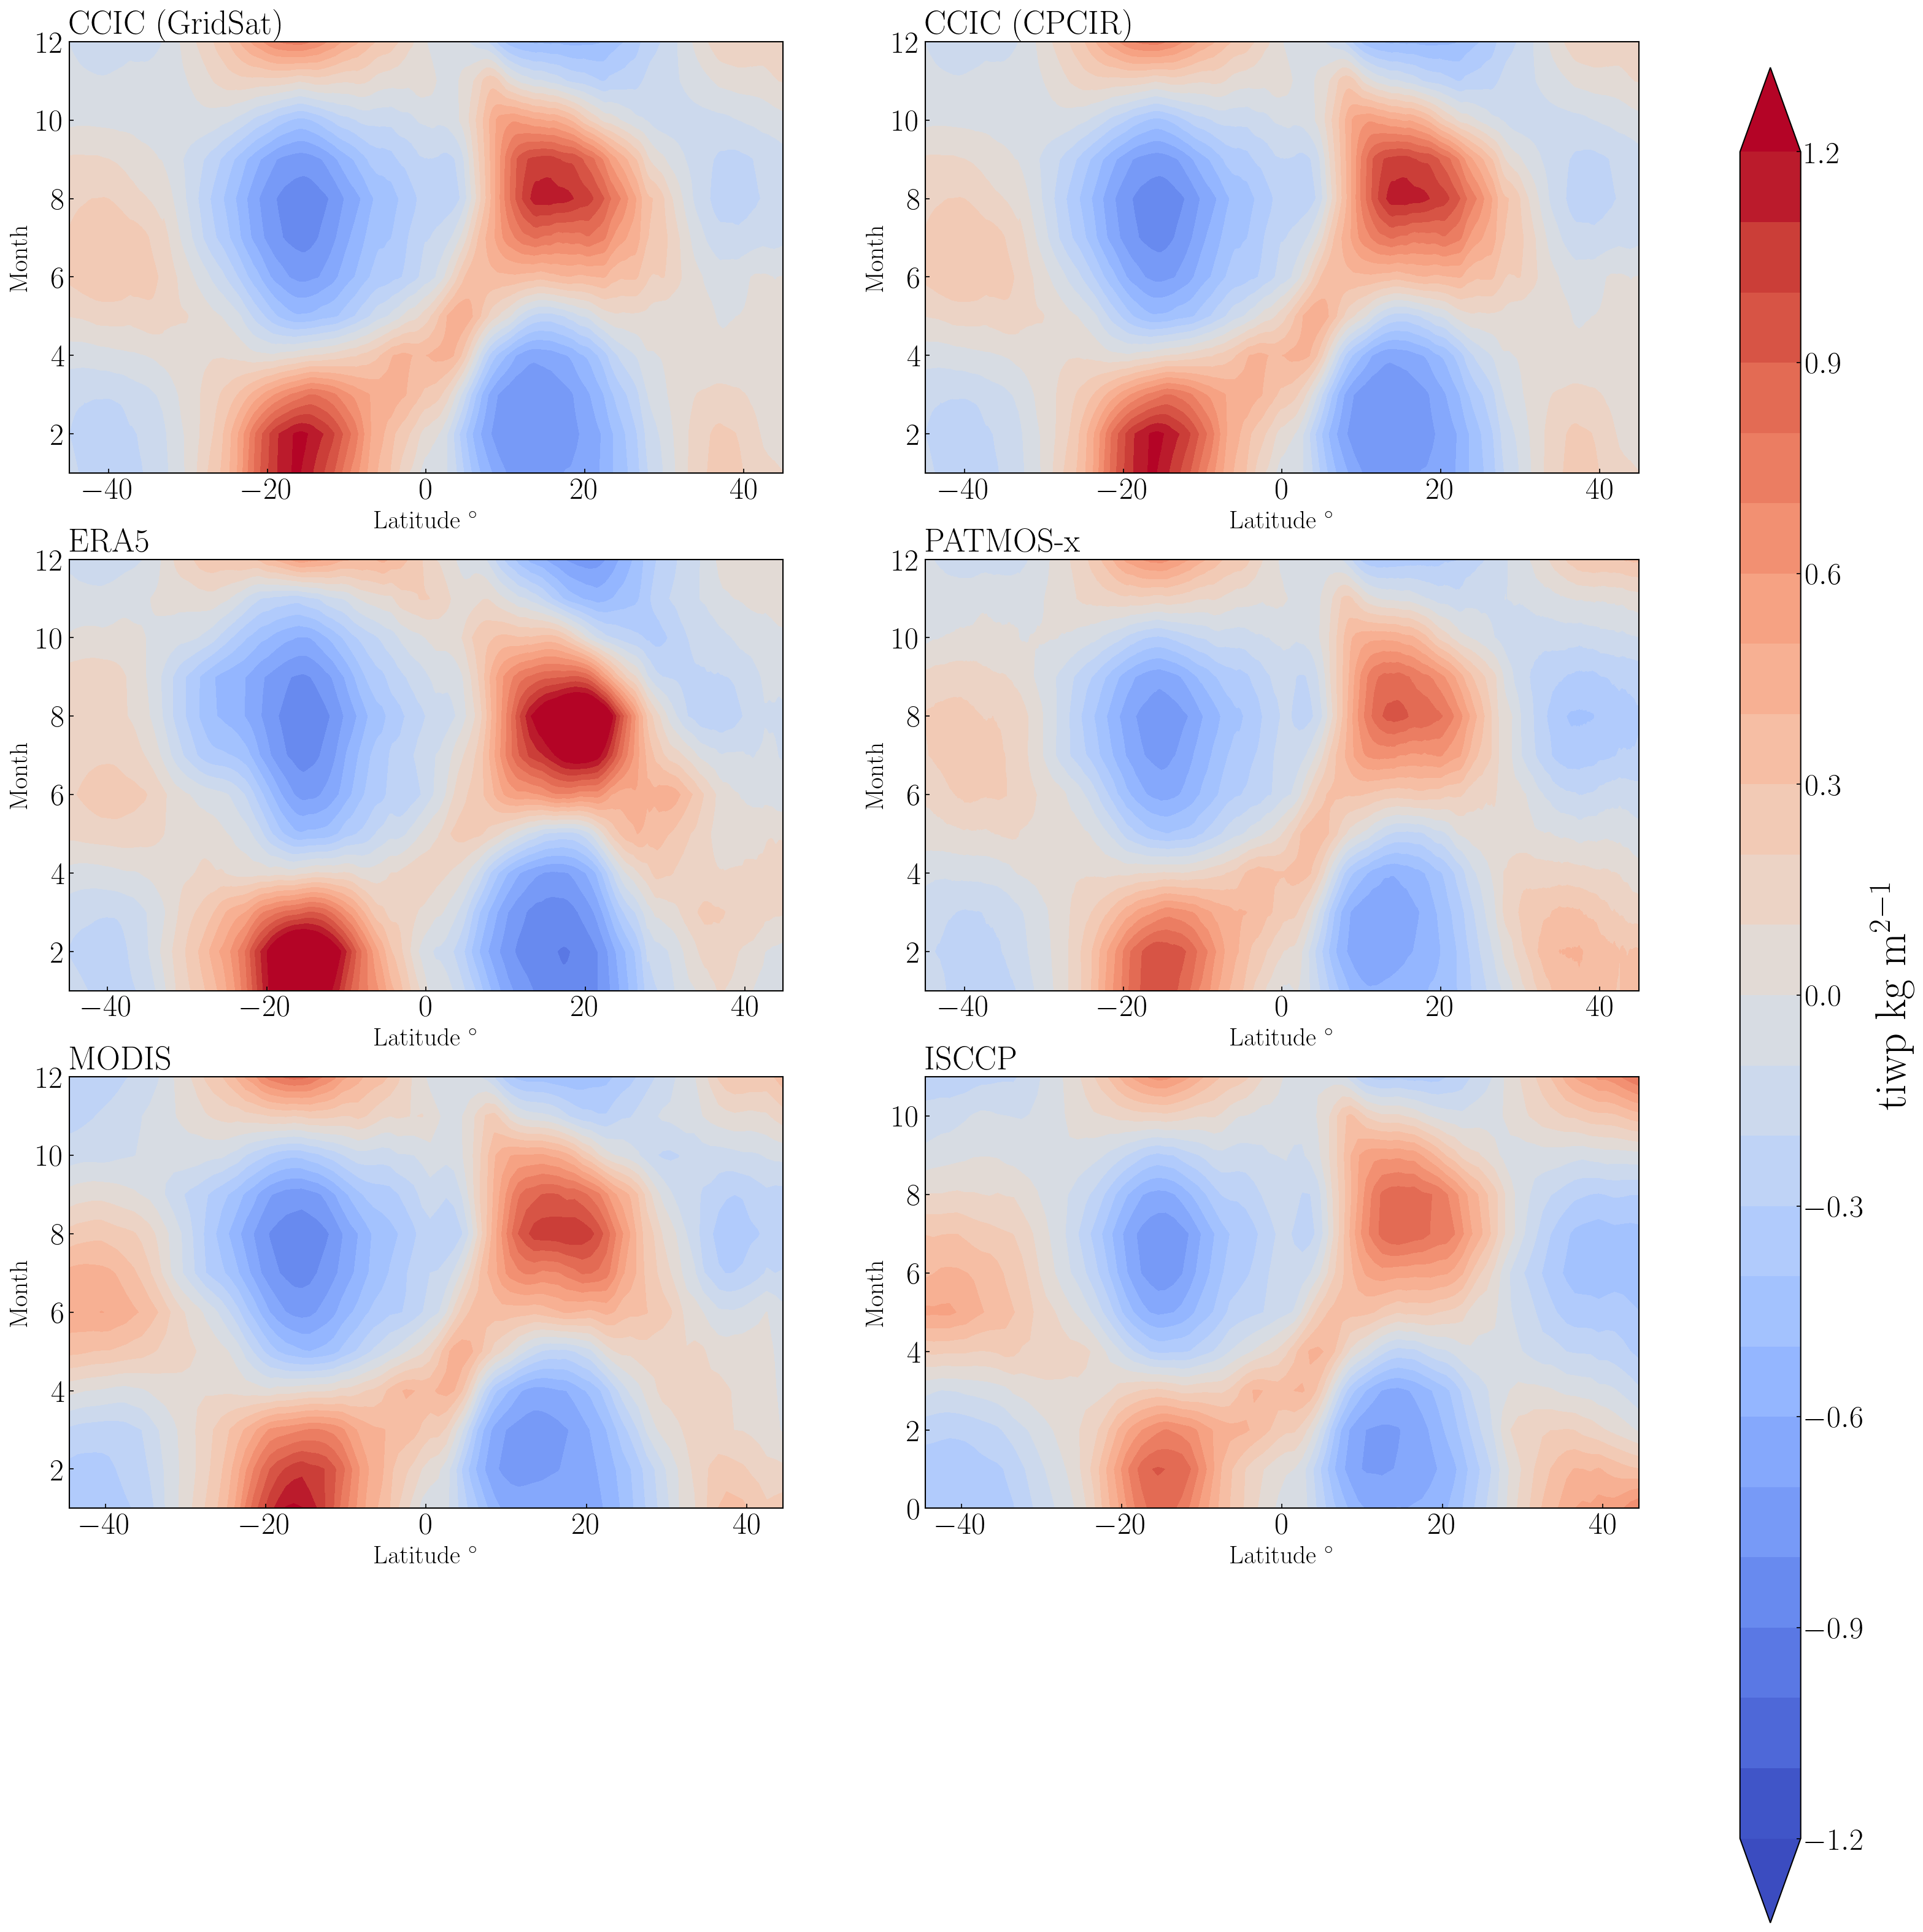

In [86]:
fig = plt.figure(figsize=(22, 28))

levels = np.arange(0,0.325, 0.025)
cols = 2
rows = 4
fs= 26
fs_axis = 20
size = 20

levels = np.arange(-1.2, 1.3, 0.1)
cmap = sns.color_palette("coolwarm", as_cmap=True)
matplotlib.rcParams.update({'font.size': 24})

ax = plt.subplot(rows,cols, 1)
ax.set_title('CCIC (GridSat)', fontsize = fs )
m= ax.contourf(ccic_gridsat_hovmoller.latitude, ccic_gridsat_hovmoller.month.dt.month, ccic_gridsat_hovmoller, levels = levels , extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis )

ax = plt.subplot(rows,cols, 2)
ax.set_title('CCIC (CPCIR)', fontsize = fs )
m= ax.contourf(ccic_gridsat_hovmoller.latitude, ccic_gridsat_hovmoller.month.dt.month, ccic_gridsat_hovmoller, levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis )

ax=plt.subplot(rows,cols, 3)
ax.set_title('ERA5', fontsize = fs )
m=ax.contourf(era5_hovmoller.latitude, era5_hovmoller.time.dt.month, era5_hovmoller[:,0,:], levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)

ax=plt.subplot(rows,cols, 4)
ax.set_title('PATMOS-x', fontsize = fs)
m=ax.contourf(patmos_hovmoller.latitude, patmos_hovmoller.month, patmos_hovmoller, levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)

ax=plt.subplot(rows,cols, 5)
ax.set_title('MODIS', fontsize = fs)
m=ax.contourf(np.flip(modis_hovmoller.lat, axis = 0 ) , modis_hovmoller.month, modis_hovmoller.T , levels = levels,extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)


ax=plt.subplot(rows,cols, 6)
ax.set_title('ISCCP', fontsize = fs)
m=ax.contourf(isccp_hovmoller.latitude , isccp_hovmoller.month, isccp_hovmoller , levels = levels, extend = 'both', cmap = cmap)
ax.set_xlabel('Latitude $^\circ$', fontsize = fs_axis)
ax.set_ylabel('Month', fontsize = fs_axis)

#ax=plt.subplot(rows,cols, 7)
#ax.set_title('DARDAR', fontsize = fs)

#ax=plt.subplot(rows,cols, 8)
#ax.set_title('2C-ICE', fontsize = fs) 


#### colorbar #### 
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.72])
fig.colorbar(m, cax=cbar_ax).set_label(label = 'tiwp kg m$^2$$^{-1}$', size= 34) 
#plt.colorbar(m, ax = ax).set_label(label = 'tiwp kg m$^2$$^{-1}$', size= size) 

plt.savefig(path / 'plots' / 'ITCZ_evolution_monthly_zonal_anomalies.png', bbox_inches = 'tight')
plt.show()